In [1]:
!pip install -qU langchain-groq

In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="Llama-3.2-90b-Text-Preview",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    groq_api_key='Add api key'
)

In [3]:
response=llm.invoke('The first person on mars will be?')

In [4]:
print(response.content)

While we can't predict the future with certainty, there are several space agencies and private companies working towards sending humans to Mars in the coming decades. Some of the most notable ones include:

1. NASA's Artemis program: NASA plans to send the first woman and the next man to the lunar surface by 2025 and establish a sustainable presence on the Moon. The ultimate goal is to use the Moon as a stepping stone for a manned mission to Mars, which could happen as early as the 2030s.
2. SpaceX's Starship program: SpaceX, founded by Elon Musk, is developing a reusable spacecraft called Starship that is designed to take both people and cargo to the Moon, Mars, and other destinations in the solar system. Musk has stated that he hopes to send the first crewed mission to Mars in the mid-2020s, with the goal of establishing a permanent, self-sustaining human presence on the planet.
3. Blue Origin's New Armstrong program: Blue Origin, founded by Jeff Bezos, is developing a lunar lander c

In [5]:
!pip install -qU langchain_community beautifulsoup4

In [9]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://jobs.nike.com/job/R-42926?from=job%20search%20funnel")

page_data = loader.load().pop().page_content

print(page_data)

Apply for Software Engineer

Search JobsSkip navigationSearch JobsNIKE, INC. JOBSContract JobsJoin The Talent CommunityLife @ NikeOverviewBenefitsBrandsOverviewJordanConverseTeamsOverviewAdministrative SupportAdvanced InnovationAir Manufacturing InnovationAviationCommunicationsCustomer ServiceDesignDigitalFacilitiesFinance & AccountingGovernment & Public AffairsHuman ResourcesInsights & AnalyticsLegalManufacturing & EngineeringMarketingMerchandisingPlanningPrivacyProcurementProduct Creation, Development & ManagementRetail CorporateRetail StoresSalesSocial & Community ImpactSports MarketingStrategic PlanningSupply Chain, Distribution & LogisticsSustainabilityTechnologyLocationsOverviewNike WHQNike New York HQEHQ: Hilversum, The NetherlandsELC: Laakdal, BelgiumGreater China HQDiversity, Equity & InclusionOverviewMilitary InclusionDisability InclusionIndigenous InclusionInternshipsTechnologySoftware EngineerBeaverton, OregonBecome a Part of the NIKE, Inc. TeamNIKE, Inc. does more than out

In [25]:
from langchain_core.prompts import PromptTemplate
prompt_extract=PromptTemplate.from_template(
        """
        ### SCRAPED TEXT FROM WEBSITE:
        {page_data}
        ### INSTRUCTION:
        The scraped text is from the career's page of a website.
        Your job is to extract the job postings and return them in JSON format containing the
        following keys: `role`, `experience`, `skills` and `description`.
        Only return the valid JSON.
        ### VALID JSON (NO PREAMBLE):
        """
)
chain=prompt_extract | llm
res=chain.invoke(input={'page_data':page_data}).content
print(res)

```json
{
  "role": "Software Engineer",
  "experience": "24 months of experience in the job offered or a computer-related occupation",
  "skills": [
    "Cognos analytics",
    "Planning analytics and TM1",
    "Teradata",
    "Snowflake",
    "Databricks",
    "Oracle",
    "SQL Server, AWS, and Azure",
    "ETL Tools",
    "Scripting using Linux",
    "Jenkins, AutoSys",
    "Large scale systems and applications"
  ],
  "description": "Develop, code, configure, and test automations, programs, and solutions independently with minimal supervision to meet the process automation platform needs. Collaborate with cross-functional teams, including software engineers, architects, and product managers across the domains to understand the requirements and develop scalable platform capabilities with observability and high availability. Build pipelines to deploy orchestration services and automations in AWS and Azure. Define and implement the key metrics to evaluate the platform usage and provi

In [22]:
type(res)

str

In [26]:
from langchain_core.output_parsers import JsonOutputParser
json_parser=JsonOutputParser()
json_res=json_parser.parse(res)
print(json_res)

{'role': 'Software Engineer', 'experience': '24 months of experience in the job offered or a computer-related occupation', 'skills': ['Cognos analytics', 'Planning analytics and TM1', 'Teradata', 'Snowflake', 'Databricks', 'Oracle', 'SQL Server, AWS, and Azure', 'ETL Tools', 'Scripting using Linux', 'Jenkins, AutoSys', 'Large scale systems and applications'], 'description': 'Develop, code, configure, and test automations, programs, and solutions independently with minimal supervision to meet the process automation platform needs. Collaborate with cross-functional teams, including software engineers, architects, and product managers across the domains to understand the requirements and develop scalable platform capabilities with observability and high availability. Build pipelines to deploy orchestration services and automations in AWS and Azure. Define and implement the key metrics to evaluate the platform usage and provide useful insights to customers using monitoring dashboards and a

In [27]:
type(json_res)

dict

In [28]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.7/615.7 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.0 MB/s eta 0:00:0

In [39]:
import pandas as pd
df=pd.read_csv('/content/my_portfolio.csv')

In [40]:
df

,Techstack,Links
0,"React, Node.js, MongoDB",https://example.com/react-portfolio
1,"Angular,.NET, SQL Server",https://example.com/angular-portfolio
2,"Vue.js, Ruby on Rails, PostgreSQL",https://example.com/vue-portfolio
3,"Python, Django, MySQL",https://example.com/python-portfolio
4,"Java, Spring Boot, Oracle",https://example.com/java-portfolio
5,"Flutter, Firebase, GraphQL",https://example.com/flutter-portfolio
6,"WordPress, PHP, MySQL",https://example.com/wordpress-portfolio
7,"Magento, PHP, MySQL",https://example.com/magento-portfolio
8,"React Native, Node.js, MongoDB",https://example.com/react-native-portfolio
9,"iOS, Swift, Core Data",https://example.com/ios-portfolio


In [33]:
import chromadb
chroma_client = chromadb.Client()

In [36]:
collection=chroma_client.get_or_create_collection(name='portfolio')

In [42]:
import uuid
if not collection.count():
    for _, row in df.iterrows():
        collection.add(documents=row["Techstack"],
                       metadatas={"links": row["Links"]},
                       ids=[str(uuid.uuid4())])

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:01<00:00, 78.0MiB/s]


In [46]:
links=collection.query(query_texts=["Machine Learning"], n_results=2).get('metadatas')
links

[[{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/wordpress-portfolio'}]]

In [47]:
job=json_res
job

{'role': 'Software Engineer',
 'experience': '24 months of experience in the job offered or a computer-related occupation',
 'skills': ['Cognos analytics',
  'Planning analytics and TM1',
  'Teradata',
  'Snowflake',
  'Databricks',
  'Oracle',
  'SQL Server, AWS, and Azure',
  'ETL Tools',
  'Scripting using Linux',
  'Jenkins, AutoSys',
  'Large scale systems and applications'],
 'description': 'Develop, code, configure, and test automations, programs, and solutions independently with minimal supervision to meet the process automation platform needs. Collaborate with cross-functional teams, including software engineers, architects, and product managers across the domains to understand the requirements and develop scalable platform capabilities with observability and high availability. Build pipelines to deploy orchestration services and automations in AWS and Azure. Define and implement the key metrics to evaluate the platform usage and provide useful insights to customers using moni

In [48]:
prompt_email = PromptTemplate.from_template(
        """
        ### JOB DESCRIPTION:
        {job_description}

        ### INSTRUCTION:
        You are Mohan, a business development executive at AtliQ. AtliQ is an AI & Software Consulting company dedicated to facilitating
        the seamless integration of business processes through automated tools.
        Over our experience, we have empowered numerous enterprises with tailored solutions, fostering scalability,
        process optimization, cost reduction, and heightened overall efficiency.
        Your job is to write a cold email to the client regarding the job mentioned above describing the capability of AtliQ
        in fulfilling their needs.
        Also add the most relevant ones from the following links to showcase Atliq's portfolio: {link_list}
        Remember you are Mohan, BDE at AtliQ.
        Do not provide a preamble.
        ### EMAIL (NO PREAMBLE):

        """
        )
chain_email = prompt_email | llm
res = chain_email.invoke({"job_description": str(job), "link_list": links})
print(res.content)

Subject: Expert Software Engineering Solutions for Your Business Needs

Dear [Client's Name],

I hope this email finds you well. As a Business Development Executive at AtliQ, I came across your job description for a Software Engineer and was impressed by the scope of the role. Our team at AtliQ specializes in providing AI and software consulting services that cater to the needs of businesses like yours.

With our expertise in developing scalable platform capabilities, we believe we can help you meet your process automation platform needs. Our team has extensive experience in working with various technologies, including Cognos analytics, Planning analytics and TM1, Teradata, Snowflake, Databricks, Oracle, SQL Server, AWS, and Azure. We also have a strong background in ETL Tools, scripting using Linux, Jenkins, AutoSys, and large-scale systems and applications.

At AtliQ, we have a proven track record of delivering tailored solutions that foster scalability, process optimization, cost re

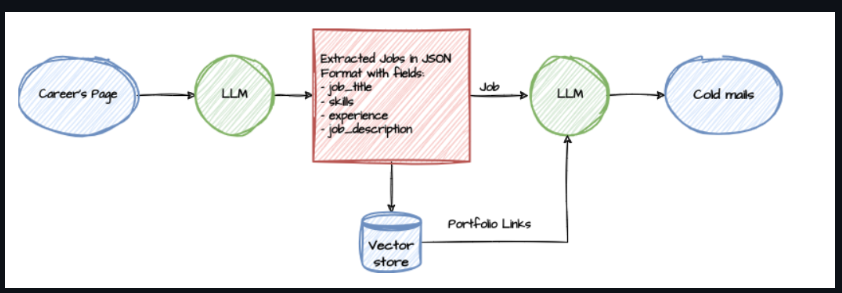